Training with Xavier initialization and ReLU activation:
Epoch 1/30


C:\Users\ACERNITRO\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


555/555 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1545 - loss: 3.0703 - val_accuracy: 0.6200 - val_loss: 1.5002
Epoch 2/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4338 - loss: 1.9468 - val_accuracy: 0.6900 - val_loss: 1.1999
Epoch 3/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5060 - loss: 1.6754 - val_accuracy: 0.7160 - val_loss: 1.0392
Epoch 4/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5392 - loss: 1.5654 - val_accuracy: 0.7470 - val_loss: 0.9757
Epoch 5/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5660 - loss: 1.4806 - val_accuracy: 0.7360 - val_loss: 0.9212
Epoch 6/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5779 - loss: 1.4252 - val_accuracy: 0.7510 - val_loss: 0.8580
Epoch 7/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5877 - loss: 1.4009 - val_accuracy: 0.7560 - val_loss: 0.8515
Epoch 8/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5962 - loss: 1.3552 - val_accuracy: 0.7550 - val_

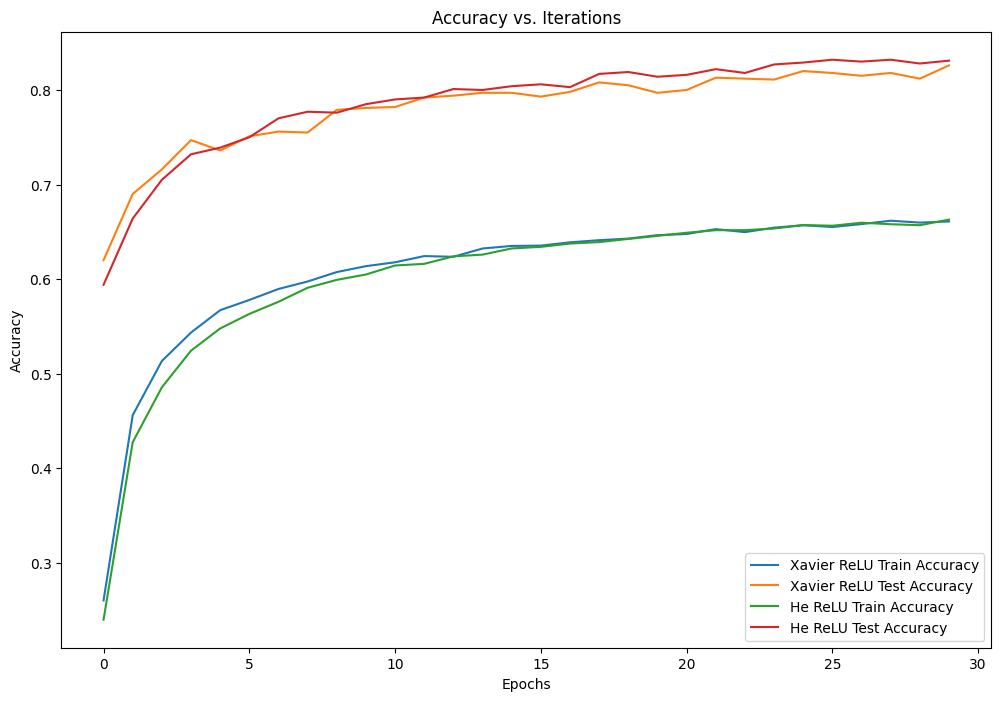

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the data
df = pd.read_csv('str_2_num.csv')
data = np.array(df)
np.random.seed(0)
np.random.shuffle(data)

test = data[:1000]
test = test.T
y_test = test[0]
X_test = test[1:]
X_test = X_test / 255.0

train = data[1000:]
train = train.T
y_train = train[0]
X_train = train[1:]
X_train = X_train / 255.0

# Convert to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train.T, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test = tf.convert_to_tensor(X_test.T, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

# One-hot encoding
y_train = tf.one_hot(y_train, 36)
y_test = tf.one_hot(y_test, 36)

# Define the neural network with Xavier initialization and dropout
def create_model(initializer='glorot_uniform', activation='relu', dropout_rate=0.5):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(32*32,)),
        tf.keras.layers.Dense(128, activation=activation, kernel_initializer=initializer),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(64, activation=activation, kernel_initializer=initializer),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(36, activation='softmax', kernel_initializer=initializer)
    ])
    return model

# Compile the model
def compile_model(model, learning_rate=0.001):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train and evaluate the model
def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=30, batch_size=128):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
    return history

# Training with Xavier initialization and ReLU activation
print("Training with Xavier initialization and ReLU activation:")
model_xavier_relu = create_model(initializer='glorot_uniform', activation='relu')
model_xavier_relu = compile_model(model_xavier_relu)
history_xavier_relu = train_and_evaluate(model_xavier_relu, X_train, y_train, X_test, y_test)

# Training with He initialization and ReLU activation
print("Training with He initialization and ReLU activation:")
model_he_relu = create_model(initializer='he_uniform', activation='relu')
model_he_relu = compile_model(model_he_relu)
history_he_relu = train_and_evaluate(model_he_relu, X_train, y_train, X_test, y_test)

# Plot the accuracy vs. iterations graph for each case
def plot_accuracy(history, label):
    plt.plot(history.history['accuracy'], label=f'{label} Train Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{label} Test Accuracy')

plt.figure(figsize=(12, 8))
plot_accuracy(history_xavier_relu, 'Xavier ReLU')
plot_accuracy(history_he_relu, 'He ReLU')
plt.title('Accuracy vs. Iterations')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Training with Xavier initialization and ReLU activation:


C:\Users\ACERNITRO\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteration 128/1500, Train Accuracy: 0.0909, Test Accuracy: 0.3170
Iteration 256/1500, Train Accuracy: 0.2250, Test Accuracy: 0.5040
Iteration 384/1500, Train Accuracy: 0.3234, Test Accuracy: 0.5640
Iteration 512/1500, Train Accuracy: 0.3772, Test Accuracy: 0.6130
Iteration 640/1500, Train Accuracy: 0.4200, Test Accuracy: 0.6280
Iteration 768/1500, Train Accuracy: 0.4526, Test Accuracy: 0.6690
Iteration 896/1500, Train Accuracy: 0.4663, Test Accuracy: 0.6720
Iteration 1024/1500, Train Accuracy: 0.4814, Test Accuracy: 0.6860
Iteration 1152/1500, Train Accuracy: 0.4933, Test Accuracy: 0.6930
Iteration 1280/1500, Train Accuracy: 0.5095, Test Accuracy: 0.6910
Iteration 1408/1500, Train Accuracy: 0.5174, Test Accuracy: 0.6980
Training with He initialization and ReLU activation:
Iteration 128/1500, Train Accuracy: 0.0807, Test Accuracy: 0.2910
Iteration 256/1500, Train Accuracy: 0.1978, Test Accuracy: 0.4780
Iteration 384/1500, Train Accuracy: 0.2825, Test Accuracy: 0.5330
Iteration 512/1500,

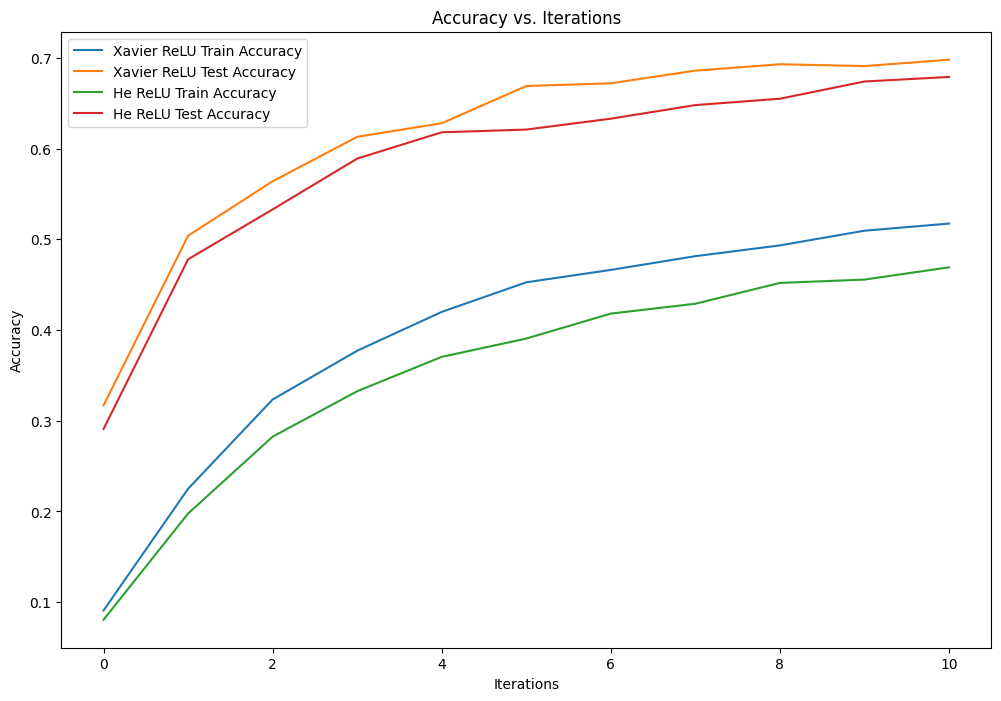

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the data
df = pd.read_csv('str_2_num.csv')
data = np.array(df)
np.random.seed(0)
np.random.shuffle(data)

test = data[:1000]
test = test.T
y_test = test[0]
X_test = test[1:]
X_test = X_test / 255.0

train = data[1000:]
train = train.T
y_train = train[0]
X_train = train[1:]
X_train = X_train / 255.0

# Convert to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train.T, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test = tf.convert_to_tensor(X_test.T, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

# One-hot encoding
y_train = tf.one_hot(y_train, 36)
y_test = tf.one_hot(y_test, 36)

# Define the neural network with Xavier initialization and dropout
def create_model(initializer='glorot_uniform', activation='relu', dropout_rate=0.5):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(32*32,)),
        tf.keras.layers.Dense(128, activation=activation, kernel_initializer=initializer),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(64, activation=activation, kernel_initializer=initializer),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(36, activation='softmax', kernel_initializer=initializer)
    ])
    return model

# Compile the model
def compile_model(model, learning_rate=0.001):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Custom training loop
def custom_train(model, X_train, y_train, X_test, y_test, iterations=1500, batch_size=128):
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
    test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

    train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
    test_acc_metric = tf.keras.metrics.CategoricalAccuracy()

    train_acc = []
    test_acc = []

    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset.repeat(), start=1):
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            loss_value = tf.keras.losses.categorical_crossentropy(y_batch_train, logits)

        grads = tape.gradient(loss_value, model.trainable_weights)
        model.optimizer.apply_gradients(zip(grads, model.trainable_weights))

        train_acc_metric.update_state(y_batch_train, logits)

        if step % batch_size == 0:
            train_acc.append(train_acc_metric.result().numpy())
            train_acc_metric.reset_state()

            for x_batch_test, y_batch_test in test_dataset:
                test_logits = model(x_batch_test, training=False)
                test_acc_metric.update_state(y_batch_test, test_logits)

            test_acc.append(test_acc_metric.result().numpy())
            test_acc_metric.reset_state()

            print(f"Iteration {step}/{iterations}, Train Accuracy: {train_acc[-1]:.4f}, Test Accuracy: {test_acc[-1]:.4f}")

        if step >= iterations:
            break

    return train_acc, test_acc

# Training with Xavier initialization and ReLU activation
print("Training with Xavier initialization and ReLU activation:")
model_xavier_relu = create_model(initializer='glorot_uniform', activation='relu')
model_xavier_relu = compile_model(model_xavier_relu)
train_acc_xavier_relu, test_acc_xavier_relu = custom_train(model_xavier_relu, X_train, y_train, X_test, y_test)

# Training with He initialization and ReLU activation
print("Training with He initialization and ReLU activation:")
model_he_relu = create_model(initializer='he_uniform', activation='relu')
model_he_relu = compile_model(model_he_relu)
train_acc_he_relu, test_acc_he_relu = custom_train(model_he_relu, X_train, y_train, X_test, y_test)

# Plot the accuracy vs. iterations graph for each case
def plot_accuracy(train_acc, test_acc, label):
    plt.plot(train_acc, label=f'{label} Train Accuracy')
    plt.plot(test_acc, label=f'{label} Test Accuracy')

plt.figure(figsize=(12, 8))
plot_accuracy(train_acc_xavier_relu, test_acc_xavier_relu, 'Xavier ReLU')
plot_accuracy(train_acc_he_relu, test_acc_he_relu, 'He ReLU')
plt.title('Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


72000 1025
Training with Original Initialization:
Iteration 0, Accuracy: 0.021746478873239435
Iteration 50, Accuracy: 0.0887605633802817
Iteration 100, Accuracy: 0.14161971830985914
Iteration 150, Accuracy: 0.20495774647887324
Iteration 200, Accuracy: 0.2662112676056338
Iteration 250, Accuracy: 0.32190140845070425
Iteration 300, Accuracy: 0.36732394366197185
Iteration 350, Accuracy: 0.4039154929577465
Iteration 400, Accuracy: 0.4353661971830986
Iteration 450, Accuracy: 0.46083098591549293
Iteration 500, Accuracy: 0.483056338028169
Iteration 550, Accuracy: 0.5015492957746479
Iteration 600, Accuracy: 0.5170422535211268
Iteration 650, Accuracy: 0.5302112676056338
Iteration 700, Accuracy: 0.5419295774647888
Iteration 750, Accuracy: 0.5526478873239437
Iteration 800, Accuracy: 0.5619577464788732
Iteration 850, Accuracy: 0.5698873239436619
Iteration 900, Accuracy: 0.5785633802816902
Iteration 950, Accuracy: 0.5850422535211267
Iteration 1000, Accuracy: 0.5915915492957746
Iteration 1050, Accura

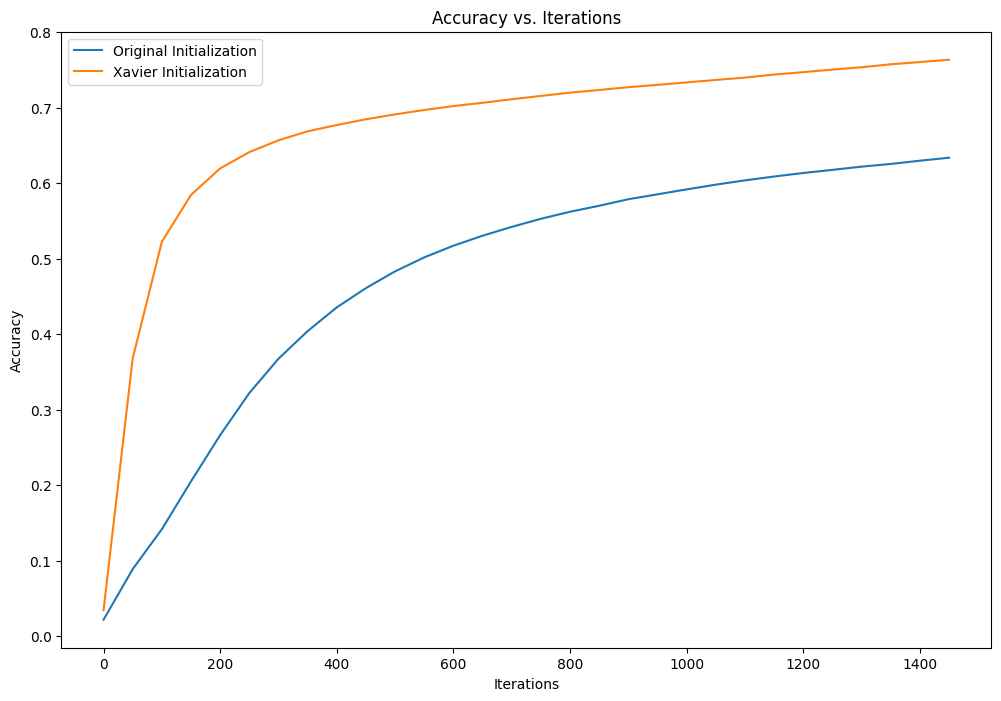

NameError: name 'make_predictions' is not defined

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc

# Load and preprocess the data
df = pd.read_csv('str_2_num.csv')
data = np.array(df)
row, column = data.shape
print(row, column)

np.random.seed(0)
np.random.shuffle(data)

test = data[:1000]
test = test.T
y_test = test[0]
X_test = test[1:]
X_test = X_test / 255.0

train = data[1000:]
train = train.T
y_train = train[0]
X_train = train[1:]
X_train = X_train / 255.0

def initialize_params_original(input_size, hidden_size, output_size):
    W1 = np.random.uniform(-0.5, 0.5, (hidden_size, input_size))
    b1 = np.random.uniform(-0.5, 0.5, (hidden_size, 1))
    W2 = np.random.uniform(-0.5, 0.5, (output_size, hidden_size))
    b2 = np.random.uniform(-0.5, 0.5, (output_size, 1))
    return W1, b1, W2, b2

def initialize_params_xavier(input_size, hidden_size, output_size):
    limit1 = np.sqrt(6 / (input_size + hidden_size))
    limit2 = np.sqrt(6 / (hidden_size + output_size))
    W1 = np.random.uniform(-limit1, limit1, (hidden_size, input_size))
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.uniform(-limit2, limit2, (output_size, hidden_size))
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def d_ReLU(Z):
    return (Z > 0).astype(float)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return e_x / e_x.sum(axis=0, keepdims=True)

def forward_propagation(W1, b1, W2, b2, A0):
    Z1 = W1 @ A0 + b1
    A1 = ReLU(Z1)
    Z2 = W2 @ A1 + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot_encoding(y, num_of_classes=36):
    vec = np.zeros((num_of_classes, len(y)))
    for index, val in enumerate(y):
        vec[val][index] = 1
    return vec

def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]
    one_hot_Y = one_hot_encoding(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * d_ReLU(Z1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)

def gradient_descent(X, Y, alpha, iterations, init_params_func):
    W1, b1, W2, b2 = init_params_func(32*32, 64, 36)
    accuracies = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 50 == 0:  # Log accuracy every 50 iterations
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            accuracies.append(accuracy)
            print(f"Iteration {i}, Accuracy: {accuracy}")
    return accuracies

# Train and record accuracy for original initialization
alpha = 0.09
iterations = 1500

print("Training with Original Initialization:")
accuracies_original = gradient_descent(X_train, y_train, alpha, iterations, initialize_params_original)

# Train and record accuracy for Xavier initialization
print("Training with Xavier Initialization:")
accuracies_xavier = gradient_descent(X_train, y_train, alpha, iterations, initialize_params_xavier)

# Plot the accuracy vs. iterations graph for both cases
plt.figure(figsize=(12, 8))
plt.plot(range(0, iterations, 50), accuracies_original, label='Original Initialization')
plt.plot(range(0, iterations, 50), accuracies_xavier, label='Xavier Initialization')
plt.title('Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Test prediction for a random index
def test_prediction(index, W1, b1, W2, b2, features, labels):
    current_image = features[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = labels[index]
    
    image = current_image.reshape((32, 32)) * 255
    plt.gray()
    plt.imshow(image, interpolation='nearest')
    plt.title(f"Prediction: {prediction[0]}, Label: {label}")
    plt.show()

# Random test
index = np.random.randint(X_test.shape[1])
W1_xavier, b1_xavier, W2_xavier, b2_xavier = initialize_params_xavier(32*32, 64, 36)
test_prediction(index, W1_xavier, b1_xavier, W2_xavier, b2_xavier, X_test, y_test)


72000 1025
Training with Original Initialization
Iteration 0, Accuracy: 0.030647887323943662
Iteration 5, Accuracy: 0.0331830985915493
Iteration 10, Accuracy: 0.039084507042253525
Iteration 15, Accuracy: 0.04523943661971831
Iteration 20, Accuracy: 0.05145070422535211
Iteration 25, Accuracy: 0.0573943661971831
Iteration 30, Accuracy: 0.06271830985915493
Iteration 35, Accuracy: 0.06767605633802817
Iteration 40, Accuracy: 0.07250704225352113
Iteration 45, Accuracy: 0.07709859154929577
Iteration 50, Accuracy: 0.08145070422535211
Iteration 55, Accuracy: 0.08607042253521127
Iteration 60, Accuracy: 0.09119718309859155
Iteration 65, Accuracy: 0.09563380281690141
Iteration 70, Accuracy: 0.10101408450704226
Iteration 75, Accuracy: 0.10605633802816901
Iteration 80, Accuracy: 0.11147887323943662
Iteration 85, Accuracy: 0.11669014084507043
Iteration 90, Accuracy: 0.12280281690140846
Iteration 95, Accuracy: 0.12861971830985916
Iteration 100, Accuracy: 0.13532394366197184
Iteration 105, Accuracy: 0.1

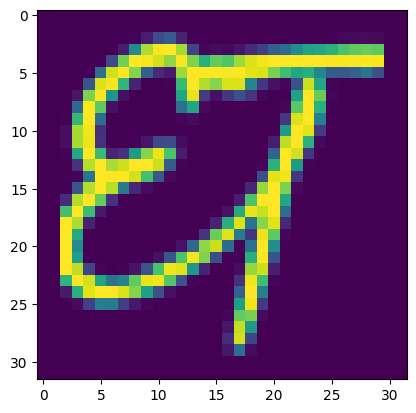

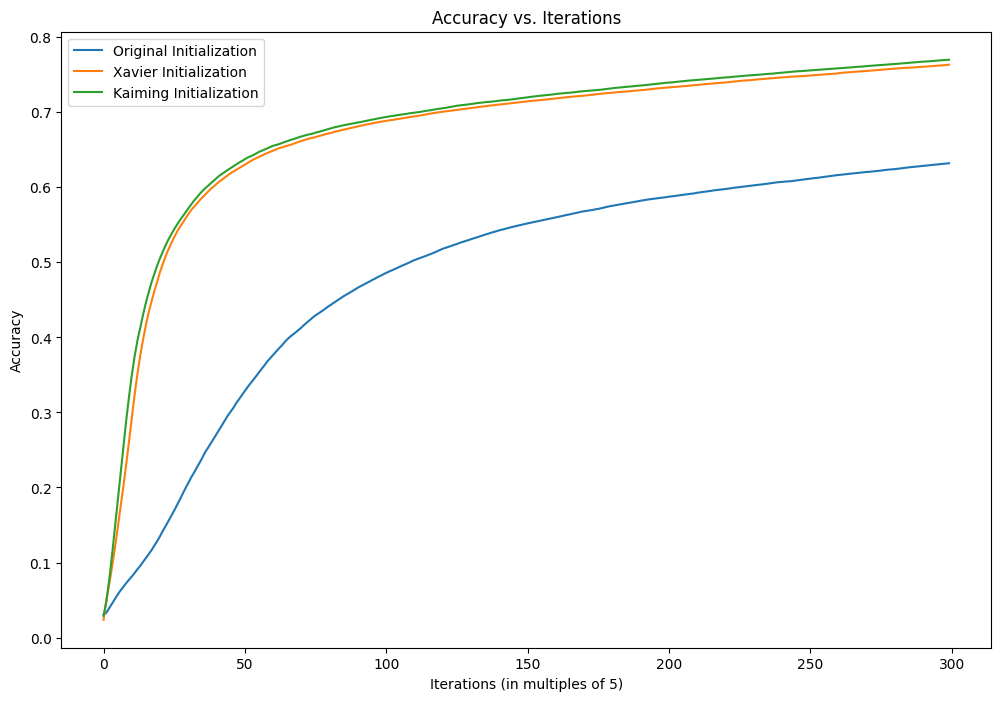

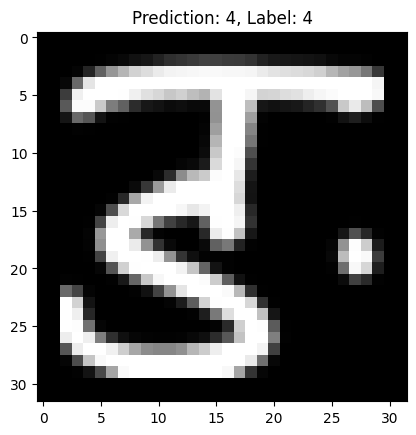

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc

# Load and preprocess the data
df = pd.read_csv('str_2_num.csv')
data = np.array(df)
row, column = data.shape
print(row, column)

np.random.seed(0)
np.random.shuffle(data)

test = data[:1000]
test = test.T
y_test = test[0]
X_test = test[1:]
X_test = X_test / 255.0

train = data[1000:]
train = train.T
y_train = train[0]
X_train = train[1:]
X_train = X_train / 255.0

X_train = np.array(X_train, dtype=np.float32)
img = X_train[:, np.random.randint(X_train.shape[1])]
plt.imshow(img.reshape(32, 32))

# Original initialization function
def initialize_params_original(input_size, hidden_size, output_size):
    W1 = np.random.uniform(-0.5, 0.5, (hidden_size, input_size))
    b1 = np.random.uniform(-0.5, 0.5, (hidden_size, 1))
    W2 = np.random.uniform(-0.5, 0.5, (output_size, hidden_size))
    b2 = np.random.uniform(-0.5, 0.5, (output_size, 1))
    return W1, b1, W2, b2

# Xavier initialization function
def initialize_params_xavier(input_size, hidden_size, output_size):
    limit1 = np.sqrt(6 / (input_size + hidden_size))
    limit2 = np.sqrt(6 / (hidden_size + output_size))
    W1 = np.random.uniform(-limit1, limit1, (hidden_size, input_size))
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.uniform(-limit2, limit2, (output_size, hidden_size))
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

# Kaiming (He) initialization function
def initialize_params_kaiming(input_size, hidden_size, output_size):
    limit1 = np.sqrt(2 / input_size)
    limit2 = np.sqrt(2 / hidden_size)
    W1 = np.random.randn(hidden_size, input_size) * limit1
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * limit2
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def d_ReLU(Z):
    return (Z > 0).astype(float)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return e_x / e_x.sum(axis=0, keepdims=True)

def forward_propagation(W1, b1, W2, b2, A0):
    Z1 = W1 @ A0 + b1
    A1 = ReLU(Z1)
    Z2 = W2 @ A1 + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot_encoding(y, num_of_classes=36):
    vec = np.zeros((num_of_classes, len(y)))
    for index, val in enumerate(y):
        vec[val][index] = 1
    return vec

def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]
    one_hot_Y = one_hot_encoding(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * d_ReLU(Z1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)

def gradient_descent(X, Y, alpha, iterations, init_function):
    W1, b1, W2, b2 = init_function(32*32, 64, 36)
    accuracies = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 5 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            accuracies.append(accuracy)
            print(f"Iteration {i}, Accuracy: {accuracy}")
    return W1, b1, W2, b2, accuracies

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2, features, labels):
    current_image = features[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = labels[index]
    
    image = current_image.reshape((32, 32)) * 255
    plt.gray()
    plt.imshow(image, interpolation='nearest')
    plt.title(f"Prediction: {prediction[0]}, Label: {label}")
    plt.show()

alpha = 0.09
iterations = 1500

# Training with original initialization
print("Training with Original Initialization")
W1, b1, W2, b2, acc_original = gradient_descent(X_train, y_train, alpha, iterations, initialize_params_original)

# Training with Xavier initialization
print("Training with Xavier Initialization")
W1, b1, W2, b2, acc_xavier = gradient_descent(X_train, y_train, alpha, iterations, initialize_params_xavier)

# Training with Kaiming initialization
print("Training with Kaiming Initialization")
W1, b1, W2, b2, acc_kaiming = gradient_descent(X_train, y_train, alpha, iterations, initialize_params_kaiming)

# Plot the accuracy vs. iterations graph for all cases
plt.figure(figsize=(12, 8))
plt.plot(acc_original, label='Original Initialization')
plt.plot(acc_xavier, label='Xavier Initialization')
plt.plot(acc_kaiming, label='Kaiming Initialization')
plt.title('Accuracy vs. Iterations')
plt.xlabel('Iterations (in multiples of 5)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Test prediction with Kaiming initialization
index = np.random.randint(X_test.shape[1])
test_prediction(index, W1, b1, W2, b2, X_test, y_test)


In [10]:
import pickle
# Save models
with open('model_original.pkl', 'wb') as f:
    pickle.dump((W1, b1, W2, b2, acc_original), f)

with open('model_xavier.pkl', 'wb') as f:
    pickle.dump((W1, b1, W2, b2, acc_xavier), f)

with open('model_kaiming.pkl', 'wb') as f:
    pickle.dump((W1, b1, W2, b2, acc_kaiming), f)